In [22]:
import acquire
import prepare
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic_data(df)

In [9]:
df = df.dropna()

In [10]:
train, test = train_test_split(df, test_size=.3, random_state=123, stratify=df[['survived']])

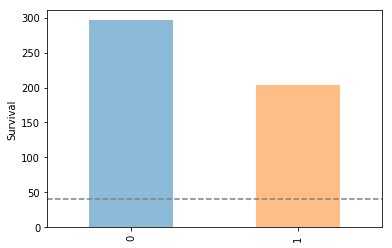

In [16]:
survival_rate = train.survived.mean()*100

p = train.survived.value_counts().plot(kind="bar", alpha=.5)
p.set_ylabel('Survival')
p.axhline(survival_rate, ls='--', color='gray')

In [12]:
train.survived.value_counts()


0    296
1    203
Name: survived, dtype: int64

In [13]:
203/296

0.6858108108108109

/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


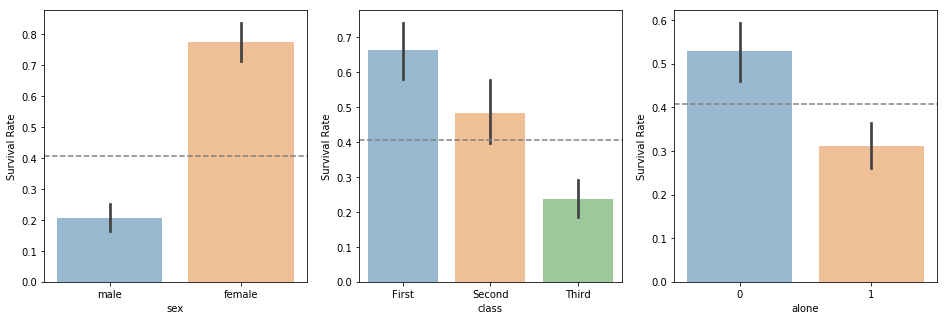

In [18]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


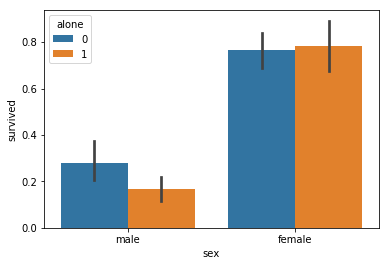

In [23]:
sns.barplot('sex', 'survived', data=train, hue='alone')

In [24]:
train.groupby(['sex','alone'])['survived'].count()
# pd.crosstab(train.sex, train.alone, margins=True).style.background_gradient(cmap='YlOrRd')

sex     alone
female  0        112
        1         65
male    0        107
        1        215
Name: survived, dtype: int64

In [25]:
df_family = train[train['alone']==0]

In [26]:
train.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')

/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


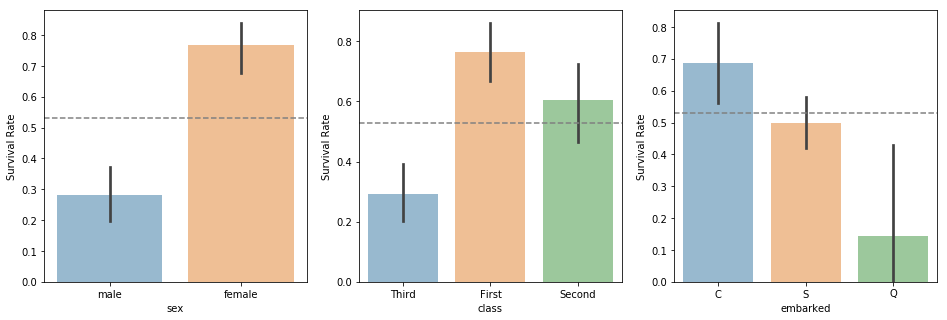

In [28]:
features = ['sex', 'class', 'embarked']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = df_family.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df_family, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [32]:
pd.crosstab(df_family['class'], df_family.embarked, margins=True)
# .style.background_gradient(cmap='YlOrRd')


embarked,C,Q,S,All
class,,,,
First,24,2,46,72
Second,8,0,50,58
Third,16,5,68,89
All,48,7,164,219


In [33]:
train.columns


Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')

/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


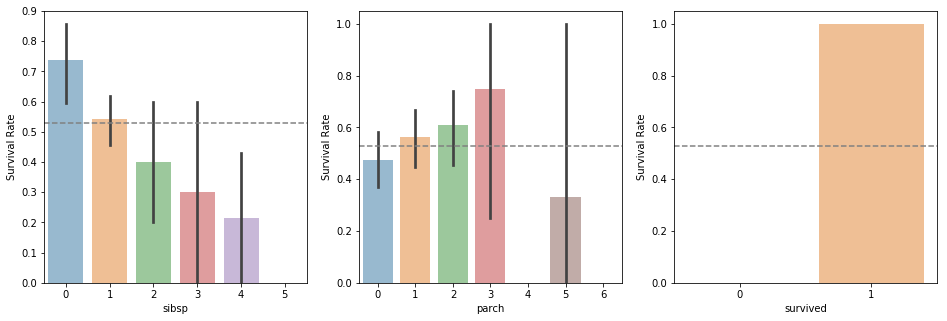

In [34]:
features = ['sibsp', 'parch', 'survived']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = df_family.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df_family, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [35]:
pd.crosstab(df_family.sibsp, df_family.parch, margins=True).style.background_gradient(cmap='YlOrRd')

parch,0,1,2,3,4,5,6,All
sibsp,,,,,,,,
0,0,24,16,1,1,0,0,42
1,71,40,12,2,2,3,1,131
2,11,4,4,1,0,0,0,20
3,2,2,6,0,0,0,0,10
4,0,8,6,0,0,0,0,14
5,0,0,2,0,0,0,0,2
All,84,78,46,4,3,3,1,219


/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


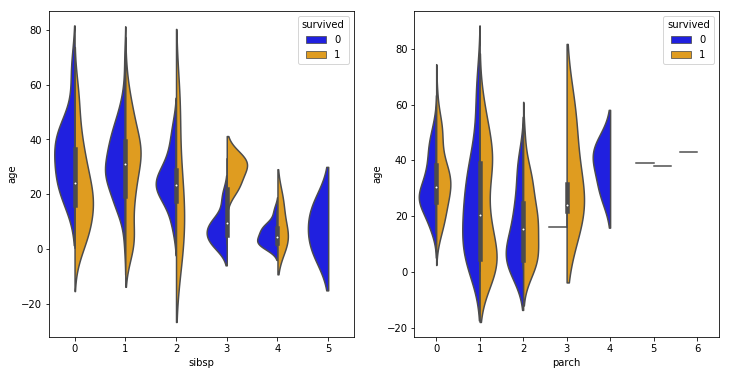

In [38]:
# 3. violin plot
features = ['sibsp', 'parch']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'age', hue='survived',
        data=df_family, split=True, ax=ax[i], palette=['blue','orange'])

/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


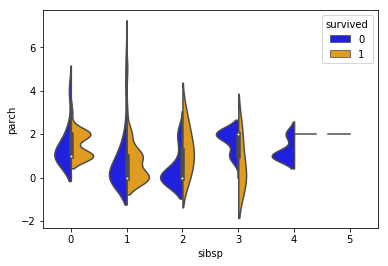

In [40]:
# 3. violin plot

sns.violinplot('sibsp', 'parch', hue='survived', 
               data=df_family, split=True, palette=['blue','orange'])

for those traveling with family:
> 3 children - less likely
3 children - more likely
traveling with spouse only - less likely
0 parch, 1 sibsp - likely to be traveling as a couple
0 sibsp - more likely to survive

In [42]:
train.sex.value_counts()

male      322
female    177
Name: sex, dtype: int64

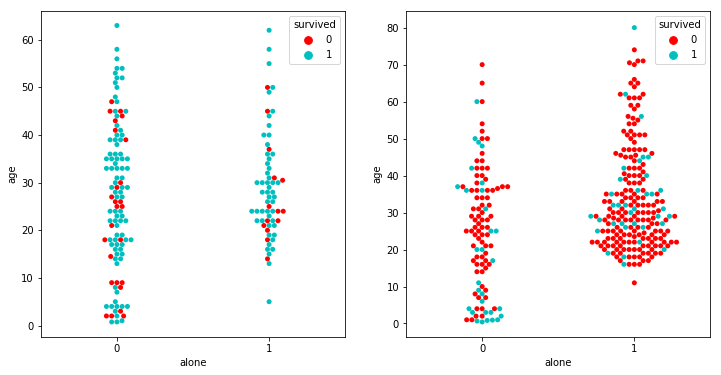

In [48]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="alone", y="age", hue="survived", 
              palette=["r", "c", "y"], ax=ax[0], data=train[train['sex']=='female'])
sns.swarmplot(x="alone", y="age", hue="survived", 
              palette=["r", "c", "y"], ax=ax[1], data=train[train['sex']=='male'])